2. Code up a C-class nearest-means classifier (NMC), for C classes and D features. 

In [1]:
# Importing the required libraries:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.spatial.distance import cdist
from plotDecBoundaries_2 import plotDecBoundaries_2

In [2]:
# Reading the dataset files:
def dataset_csvfile(file):
    df = []
    with open(file) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter = ',')
        
        for row in csv_reader:
            df.append(row)

    array = np.array(df) # Converting the datapoints to a numpy array.
    return array

In [3]:
# Normalizing the data:
def normalize(datapoints, mean):
    nomalized_data = []
    
    for ele in range(len(datapoints)):
        class_1 = np.linalg.norm(datapoints[ele] - mean[0])
        class_2 = np.linalg.norm(datapoints[ele] - mean[1])
        class_3 = np.linalg.norm(datapoints[ele] - mean[2])
        class_4 = np.linalg.norm(datapoints[ele] - mean[3])
        class_5 = np.linalg.norm(datapoints[ele] - mean[4])
        all_class = [class_1, class_2, class_3, class_4, class_5]
        nomalized_data.append(all_class.index(min(all_class)))
        
    return np.array(nomalized_data)

In [4]:
# Training the classifier with only two features:
def training(fc, sc):
    mean_1 = np.mean(fc[sc == 0], axis = 0)
    mean_2 = np.mean(fc[sc == 1], axis = 0)
    mean_3 = np.mean(fc[sc == 2], axis = 0)
    mean_4 = np.mean(fc[sc == 3], axis = 0)
    mean_5 = np.mean(fc[sc == 4], axis = 0)
    allclass_mean = np.array([[mean_1[0], mean_1[1]], [mean_2[0], mean_2[1]], [mean_3[0], mean_3[1]], [mean_4[0], mean_4[1]], [mean_5[0], mean_5[1]]])
    return allclass_mean

In [5]:
# Training the model with all the features:
def training_allclass(afc, asc):
    mean_1 = np.mean(afc[asc == 0], axis = 0)
    mean_2 = np.mean(afc[asc == 1], axis = 0)
    mean_3 = np.mean(afc[asc == 2], axis = 0)
    mean_4 = np.mean(afc[asc == 3], axis = 0)
    mean_5 = np.mean(afc[asc == 4], axis = 0)  
    allclass_mean = np.array([mean_1[:], mean_2[:], mean_3[:], mean_4[:], mean_5[:]])
    return allclass_mean

In [6]:
# Computing the misclassification rate:
def classification_error(true, predicted):
    misclassification = 0
    
    for ele in range(len(predicted)):
        
        if true[ele] != predicted[ele]:
                   misclassification += 1
    
    return 100 - (100 * misclassification / len(predicted))

(a) Run it on the given dataset. There are C = 5 classes and D = 7 features. Report the classification accuracy on the training set and test set.

In [27]:
train_7 = dataset_csvfile('HW2_train_set.csv')
fv = train_7[1:, :7].astype(float)
sv = train_7[1:, -1].astype(int)
mean = training_allclass(fv, sv)
model_prediction_7 = normalize(fv, mean)
misclass = classification_error(model_prediction_7, sv)
print("Accuracy during training phase =" , misclass, "%")

Accuracy during training phase = 85.23809523809524 %


In [28]:
test_7 = dataset_csvfile('HW2_test_set.csv')
fv_test = test_7[1:, :7].astype(float)
sv_test = test_7[1:, -1].astype(int)
model_prediction_test_7 = normalize(fv_test, mean)
misclass_test = classification_error(model_prediction_test_7, sv_test)
print("Accuracy during testing phase =" , misclass_test, "%")

Accuracy during testing phase = 82.44444444444444 %


(b) For visualization, run it again using only the following 2 features: X1 and X2. Plot in 2D feature space: the training data, decision boundaries, and decision regions for all the classes. Report the classification accuracy on the training set and test set, using only the 2 features.

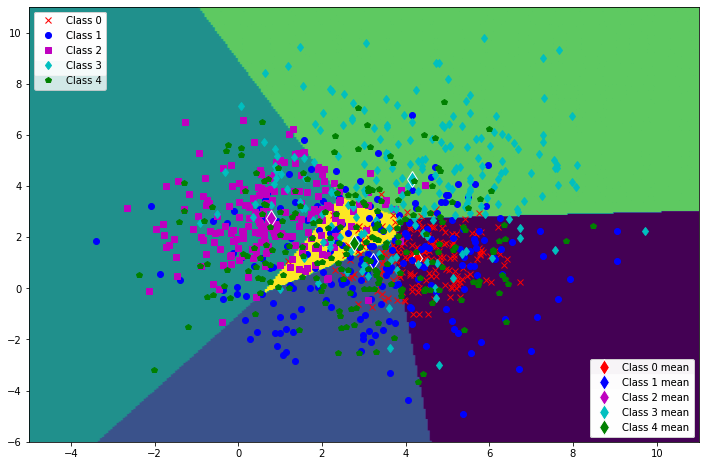

Accuracy during training phase = 50.857142857142854 %


In [21]:
train_2 = dataset_csvfile('HW2_train_set.csv')
fv_2 = train_2[1:, :2].astype(float)
sv_2 = train_2[1:, -1].astype(int)
mean_2f = training(fv_2, sv_2)
model_prediction_2 = normalize(fv_2, mean_2f)
plotDecBoundaries_2(fv_2, sv_2, mean_2f, (12, 8), True)
misclass_2f = classification_error(model_prediction_2, sv_2)
print("Accuracy during training phase =" , misclass_2f, "%")

In [20]:
test_2 = dataset_csvfile('HW2_test_set.csv')
fv_test_2 = test_2[1:, :2].astype(float)
sv_test_2 = test_2[1:, -1].astype(int)
model_prediction_test_2 = normalize(fv_test_2, mean_2f)
misclass_test_2f = classification_error(model_prediction_test_2, sv_test_2)
print("Accuracy during testing phase =" , misclass_test_2f, "%")

Accuracy during testing phase = 48.0 %


(c) Repeat (b) using only the following features: X3 and X4.

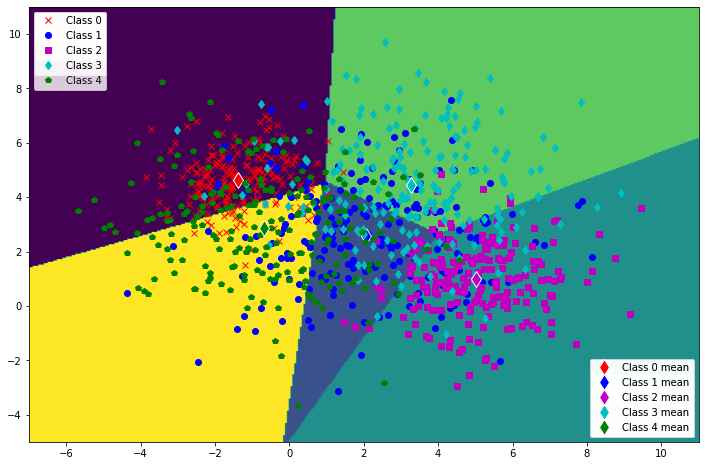

Accuracy during training phase = 60.95238095238095 %


In [22]:
train_2af = dataset_csvfile('HW2_train_set.csv')
fv_2af = train_2af[1:, [2, 3]].astype(float)
sv_2af = train_2af[1:, -1].astype(int)
mean_2af = training(fv_2af, sv_2af)
model_prediction_2af = normalize(fv_2af, mean_2af)
plotDecBoundaries_2(fv_2af, sv_2af, mean_2af, (12, 8), True)
misclass_2af = classification_error(model_prediction_2af, sv_2af)
print("Accuracy during training phase =" , misclass_2af, "%")

In [23]:
test_2af = dataset_csvfile('HW2_test_set.csv')
fv_test_2af = test_2af[1:, [2, 3]].astype(float)
sv_test_2af = test_2af[1:, -1].astype(int)
model_prediction_test_2af = normalize(fv_test_2af, mean_2af)
misclass_test_2af = classification_error(model_prediction_test_2af, sv_test_2af)
print("Accuracy during testing phase =" , misclass_test_2af, "%")

Accuracy during testing phase = 60.44444444444444 %


(d) Repeat (b) using only the following features: X3 and X7.

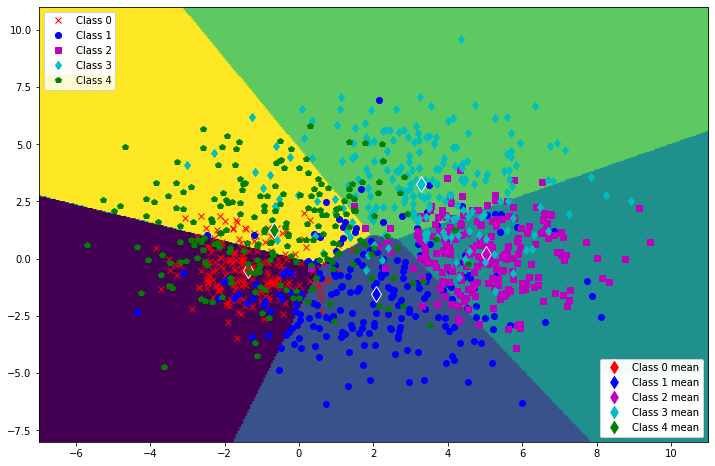

Accuracy during training phase = 67.61904761904762 %


In [25]:
train_37f = dataset_csvfile('HW2_train_set.csv')
fv_37f = train_37f[1:, [2, 6]].astype(float)
sv_37f = train_37f[1:, -1].astype(int)
mean_37f = training(fv_37f, sv_37f)
model_prediction_37f = normalize(fv_37f, mean_37f)
plotDecBoundaries_2(fv_37f, sv_37f, mean_37f, (12, 8), True)
misclass_37f = classification_error(model_prediction_37f, sv_37f)
print("Accuracy during training phase =" , misclass_37f, "%")

In [26]:
test_37f = dataset_csvfile('HW2_test_set.csv')
fv_test_37f = test_37f[1:, [2, 6]].astype(float)
sv_test_37f = test_37f[1:, -1].astype(int)
model_prediction_37f = normalize(fv_test_37f, mean_37f)
misclass_test_37f = classification_error(model_prediction_37f, sv_test_37f)
print("Accuracy during testing phase =" , misclass_test_37f, "%")

Accuracy during testing phase = 63.77777777777778 %
